# Google Sentiment Analysis

Thisn notebook is use to explore the data that we have collected from twitter using tweepy package. It comprises the data cleaning and basic data exploration .Also tested with textBlob and Vader for calculate the polarity of tweets in order to determine the tweets are positive, negative or neutral sentiments.

## Install Required Packages 

In [1]:
# Install Libraries
#!pip install textblob
#!pip install tweepy
#!pip install pycountry
#!pip install langdetect
#!pip install wordcloud

     |████████████████████████████████| 636 kB 4.6 MB/s 


In [50]:
#pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158801 sha256=85e58fcc7577c0957d119618749c3da92be1945061b8ecb6fc91ac210b722aae
  Stored in directory: /Users/sojasingarayar/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [78]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import seaborn as sns

#from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# Authentication
# Run this code only for to scrap tweetts directly from here 
consumer_key = "XXXXXXXXXXXXXXXXXXXXXXXXXXXX"
consumer_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token = "XXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXXXX"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [39]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sojasingarayar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
#Sentiment Analysis
#Import existing dataset

def percentage(part,whole):
    return 100 * float(part)/float(whole) 
# Importing dataset
df=pd.read_csv('/Users/sojasingarayar/Documents/Projet-Interne-IBMI/Sentiment_Analysis/BasicScraper/google_products-tweets.csv') 
tweets = list(df['Text'])

noOfTweet = df.shape[0]

positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    #tweet_list.append(tweet.text)
    #analysis = TextBlob(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [12]:
#Importing directly
#Sentiment Analysis

"""def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.user_timeline, q=keyword).items(noOfTweet)


positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    #tweet_list.append(tweet.text)
    #analysis = TextBlob(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')"""

Unexpected parameter: q
Unexpected parameter: q
Unexpected parameter: q
Unexpected parameter: q
Unexpected parameter: q


In [15]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  150
positive number:  72
negative number:  12
neutral number:  66


In [16]:
tweet_list

,0
0,@googlemeetvolu1 Hi there. Thanks for the feed...
1,"@Percivale_ Hi, Perci. Just checking in, are y..."
2,@maerlynofmiria Hi there. Could you please tel...
3,@MlNTINTOSH Hi there. Try clearing the cache o...
4,@AaftabA64331240 Hi Aaftab. We'd like to move ...
...,...
145,@Pankajk24379446 Hi Pankaj. You can skip that ...
146,@Mike92916593 Hmm. Let's see what we can do to...
147,@KdStetus Hi there. Let's see what we can do t...
148,@_shaunwaters Hi there. Have you already tried...


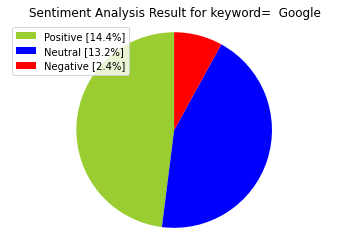

In [17]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [18]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [19]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#del tw_list[0]
tw_list

,0,text
0,@googlemeetvolu1 Hi there. Thanks for the feed...,@googlemeetvolu1 Hi there. Thanks for the feed...
1,"@Percivale_ Hi, Perci. Just checking in, are y...","@Percivale_ Hi, Perci. Just checking in, are y..."
2,@maerlynofmiria Hi there. Could you please tel...,@maerlynofmiria Hi there. Could you please tel...
3,@MlNTINTOSH Hi there. Try clearing the cache o...,@MlNTINTOSH Hi there. Try clearing the cache o...
4,@AaftabA64331240 Hi Aaftab. We'd like to move ...,@AaftabA64331240 Hi Aaftab. We'd like to move ...
...,...,...
145,@Pankajk24379446 Hi Pankaj. You can skip that ...,@Pankajk24379446 Hi Pankaj. You can skip that ...
146,@Mike92916593 Hmm. Let's see what we can do to...,@Mike92916593 Hmm. Let's see what we can do to...
147,@KdStetus Hi there. Let's see what we can do t...,@KdStetus Hi there. Let's see what we can do t...
148,@_shaunwaters Hi there. Have you already tried...,@_shaunwaters Hi there. Have you already tried...


In [21]:
tweet_list

,text
0,@googlemeetvolu1 Hi there. Thanks for the feed...
1,"@Percivale_ Hi, Perci. Just checking in, are y..."
2,@maerlynofmiria Hi there. Could you please tel...
3,@MlNTINTOSH Hi there. Try clearing the cache o...
4,@AaftabA64331240 Hi Aaftab. We'd like to move ...
...,...
145,@Pankajk24379446 Hi Pankaj. You can skip that ...
146,@Mike92916593 Hmm. Let's see what we can do to...
147,@KdStetus Hi there. Let's see what we can do t...
148,@_shaunwaters Hi there. Have you already tried...


In [23]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
#tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,text
0,hi there thanks for the feedback you can a...
1,hi perci just checking in are you still ...
2,hi there could you please tell us more abou...
3,hi there try clearing the cache of the goog...
4,hi aaftab we d like to move this conversati...
5,he m hi there let s see what we can do to ...
6,hi syed we d like to move this conversation...
7,hi there let s see what we can do to help ...
8,hi anshul have you already tried recovering...
9,hi adam we d like to move this conversation...


In [24]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
#VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule/lexicon-based, open-source sentiment analyzer pre-built library.
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,hi there thanks for the feedback you can a...,0.233333,0.233333,positive,0.0,0.643,0.357,0.7845
1,hi perci just checking in are you still ...,0.000000,0.000000,positive,0.0,0.870,0.130,0.4019
2,hi there could you please tell us more abou...,0.500000,0.500000,positive,0.0,0.821,0.179,0.6124
3,hi there try clearing the cache of the goog...,0.000000,0.000000,positive,0.0,0.819,0.181,0.4939
4,hi aaftab we d like to move this conversati...,0.000000,0.000000,positive,0.0,0.702,0.298,0.7351
5,he m hi there let s see what we can do to ...,0.000000,0.000000,positive,0.0,0.777,0.223,0.7553
6,hi syed we d like to move this conversation...,0.000000,0.000000,positive,0.0,0.789,0.211,0.5859
7,hi there let s see what we can do to help ...,0.000000,0.000000,positive,0.0,0.856,0.144,0.4019
8,hi anshul have you already tried recovering...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
9,hi adam we d like to move this conversation...,0.000000,0.000000,positive,0.0,0.760,0.240,0.7402


In [25]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [26]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [34]:
#Count_values for sentiment
pc = count_values_in_column(tw_list,"sentiment")
pc

,Total,Percentage
positive,75,50.0
neutral,63,42.0
negative,12,8.0


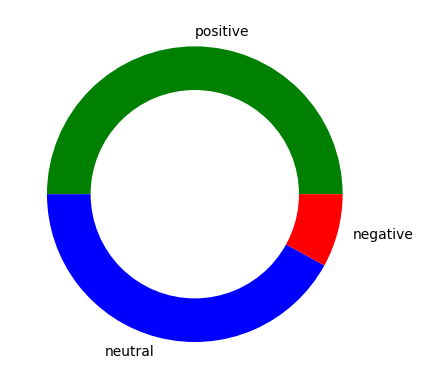

In [33]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [57]:
#Function to Create Wordcloud

def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    STOPWORDS =  set(stopwords.words('english'))
    SW = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  
                  max_words=3000,
                  stopwords=SW,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


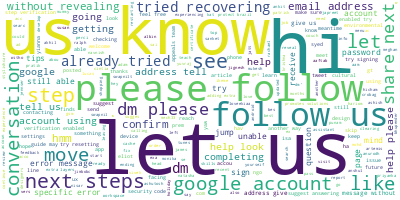

In [58]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


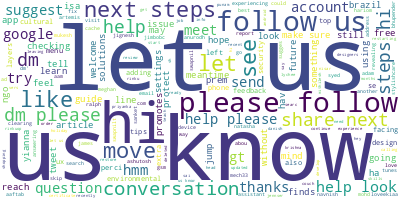

In [59]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


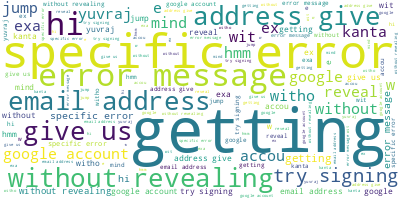

In [60]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


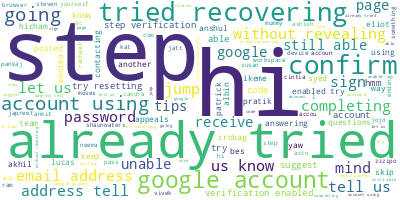

In [61]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [62]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [63]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,107.67
neutral,99.41
positive,108.00


In [64]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.92
neutral,17.25
positive,22.17


In [65]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [66]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [67]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [68]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [69]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [70]:
tw_list.head()

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,hi there thanks for the feedback you can a...,0.233333,0.233333,positive,0.0,0.643,0.357,0.7845,109,20,hi there thanks for the feedback you can a...,"[, hi, there, thanks, for, the, feedback, you,...","[, hi, thanks, feedback, also, send, meet, gt,...","[, hi, thank, feedback, also, send, meet, gt, ..."
1,hi perci just checking in are you still ...,0.000000,0.000000,positive,0.0,0.870,0.130,0.4019,103,19,hi perci just checking in are you still ...,"[, hi, perci, just, checking, in, are, you, st...","[, hi, perci, checking, still, experiencing, i...","[, hi, perci, check, still, experienc, issu, l..."
2,hi there could you please tell us more abou...,0.500000,0.500000,positive,0.0,0.821,0.179,0.6124,122,26,hi there could you please tell us more abou...,"[, hi, there, could, you, please, tell, us, mo...","[, hi, could, please, tell, us, going, google,...","[, hi, could, pleas, tell, us, go, googl, sear..."
3,hi there try clearing the cache of the goog...,0.000000,0.000000,positive,0.0,0.819,0.181,0.4939,114,21,hi there try clearing the cache of the goog...,"[, hi, there, try, clearing, the, cache, of, t...","[, hi, try, clearing, cache, google, app, fix,...","[, hi, tri, clear, cach, googl, app, fix, assi..."
4,hi aaftab we d like to move this conversati...,0.000000,0.000000,positive,0.0,0.702,0.298,0.7351,103,21,hi aaftab we d like to move this conversati...,"[, hi, aaftab, we, d, like, to, move, this, co...","[, hi, aaftab, like, move, conversation, dm, p...","[, hi, aaftab, like, move, convers, dm, pleas,..."


In [89]:
tw_list['text'][0]

'  hi there  thanks for the feedback  you can also send it here  meet  gt  settings menu  top left   gt  se   '

In [73]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

150 Number of reviews has 248 words


In [74]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aaftab,aam,abl,abou,ac,acc,acco,accou,accoun,...,wit,witho,without,workspac,yaw,yianna,yourseif,yuvraj,zandra,zizipo
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
lockdown,976
london,793
day,110
covid,106
amp,82
uk,70
go,67
new,67
last,61
morn,60


In [75]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [81]:
#n&_bigram
n1_unigrams = get_top_n_gram(tw_list['text'],(1,1),20)

n1_unigrams

[('hi', 112),
 ('let', 75),
 ('steps', 65),
 ('know', 52),
 ('account', 52),
 ('dm', 46),
 ('google', 39),
 ('help', 36),
 ('follow', 36),
 ('try', 25),
 ('like', 24),
 ('conversation', 24),
 ('just', 22),
 ('share', 22),
 ('tried', 22),
 ('recovering', 22),
 ('using', 20),
 ('revealing', 20),
 ('email', 20),
 ('address', 20)]

In [76]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('let know', 50),
 ('follow let', 36),
 ('google account', 27),
 ('let help', 25),
 ('like conversation', 24),
 ('conversation dm', 24),
 ('dm follow', 24),
 ('know share', 22),
 ('share steps', 22),
 ('tried recovering', 22),
 ('revealing email', 20),
 ('email address', 20),
 ('just confirm', 19),
 ('account using', 16),
 ('using steps', 16),
 ('tell going', 15),
 ('address tell', 14),
 ('help look', 13),
 ('look dm', 13),
 ('dm steps', 13)]

In [77]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('follow let know', 36),
 ('like conversation dm', 24),
 ('conversation dm follow', 24),
 ('dm follow let', 24),
 ('let know share', 22),
 ('know share steps', 22),
 ('revealing email address', 20),
 ('account using steps', 16),
 ('email address tell', 14),
 ('address tell going', 14),
 ('let help look', 13),
 ('help look dm', 13),
 ('look dm steps', 13),
 ('let help follow', 12),
 ('help follow let', 12),
 ('tried recovering google', 12),
 ('recovering google account', 12),
 ('google account using', 12),
 ('getting specific error', 12),
 ('specific error message', 12)]

In [85]:
def plot_word_frequency(top20):
    plt.bar(range(len(top20)), [val[1] for val in top20], align='center')
    plt.xticks(range(len(top20)), [val[0] for val in top20])
    plt.xticks(rotation=70)
    plt.show()

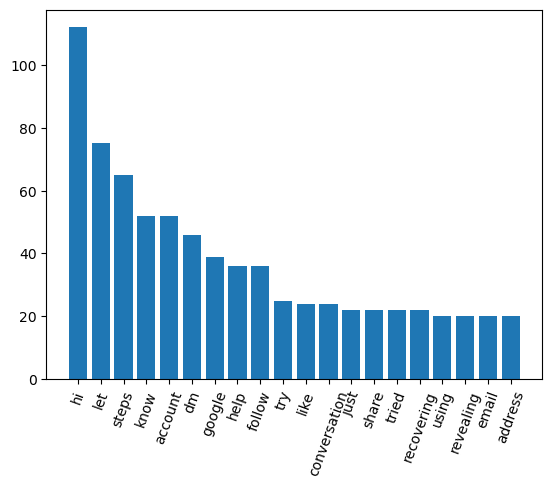

In [86]:
plot_word_frequency(n1_unigrams)

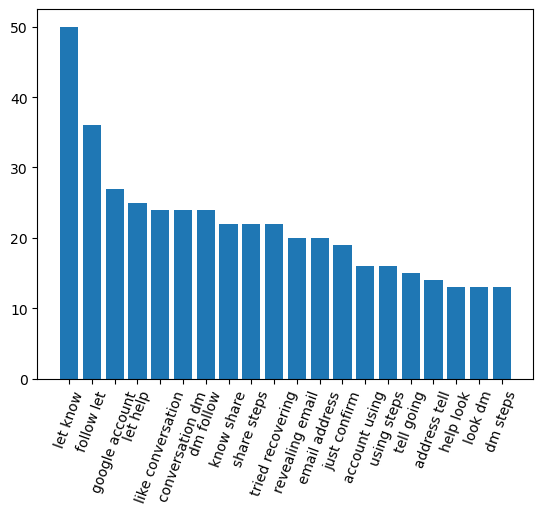

In [87]:
plot_word_frequency(n2_bigrams)

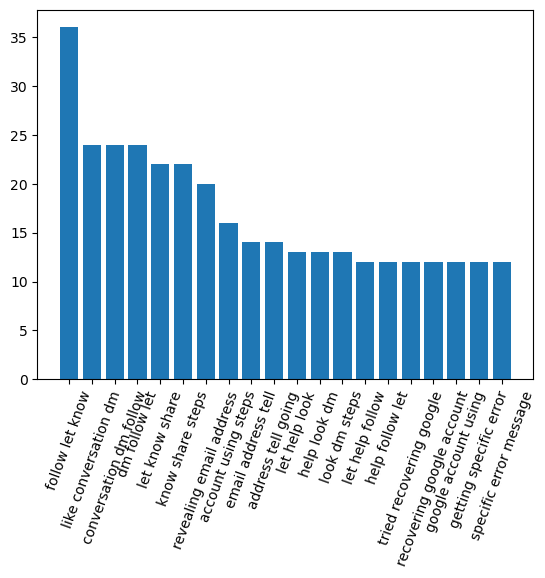

In [88]:
plot_word_frequency(n3_trigrams)

In [91]:
tw_list.shape[0]

150